## Linear Regression with SciKit-Learn

We saw how to create a very simple best fit line in simple-linear-regression notebook, but now let's  expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features

### Expanding the Questions

Previously, we explored Is there a relationship between advertising spend and sales? as well as predicting the total sales for some value of total spend. Now we want to expand this to What is the relationship between different advertising channel (TV, Radio, Newspaper) and sales? This time we will work with 3 features (TV, Radio, Newspaper) not just one.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Multiple Features (N-Dimensional)

In [2]:
tv = np.array([181,9,58,120,9,200,66,215,24,98,204,195,68,281,69,147,218,237,13,228,62,263,143,240,249])
radio = np.array([11,49,33,20,2,3,6,24,35,8,33,48,37,40,21,24,28,5,16,17,13,4,29,17,27])
newspaper = np.array([58,75,24,12,1,21,24,4,66,7,46,53,114,56,18,19,53,24,50,26,18,20,13,23,23])
sales = np.array([13,7,12,13,5,11,9,17,9,10,19,22,13,24,11,15,18,13,6,16,10,12,15,16,19])

df = pd.DataFrame({'tv': tv, 'radio': radio, 'newspaper': newspaper, 'sales': sales})
df.head()

,tv,radio,newspaper,sales
0,181,11,58,13
1,9,49,75,7
2,58,33,24,12
3,120,20,12,13
4,9,2,1,5


Let's visually display the different features on scatter plots so we can have an overview of our data.

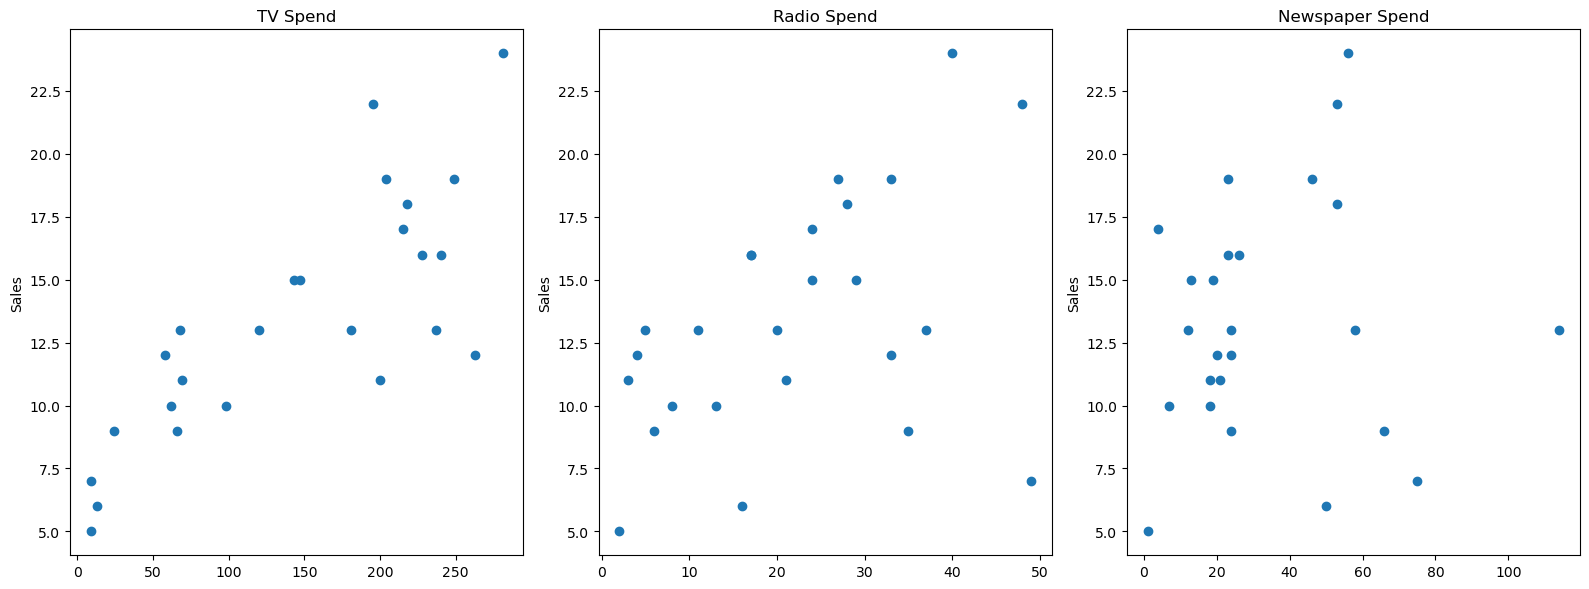

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['tv'], df['sales'], 'o')
axes[0].set_title("TV Spend")
axes[0].set_ylabel("Sales")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")

plt.tight_layout();

Prepare our data

In [4]:
# note it is capital X
X = df.drop('sales', axis=1) # get only features columns, independent variables
y = df['sales'] # get only sales column, dependent variable

### Train and Test Split

In [5]:
from sklearn.model_selection import train_test_split

With test_size=0.3 we are sending 30% of our data in the `Test split`, the other 70% will be for the `Train split`

After providing the data to the model, the data will be shuffled in random order, that is why we need random_state, to have control over the randomness. The data is shuffled, because it is usually sorted by one of the columns and we don't want the first 70% to be used as train split and the other 30% for test split for sorted data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

print(len(X_train))
print(len(X_test))

17
8


### Creating a Model (Estimator)

In [7]:
# Import a model class from a model family
from sklearn.linear_model import LinearRegression

Create an instance of the model class

In [8]:
model = LinearRegression()

Fit/Train the Model on the training data

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)
test_predictions

array([17.51336775, 15.18346071,  9.44638785,  8.60167147, 16.3665664 ,
       11.51972059, 16.68487847, 21.89238271])

### Evaluation on the Test Set

#### Metrics

Below are the three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. Larger error is for example error when 1 point on the scatter plot is really off, but the opposite values of the other points can cover that fact.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [12]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [13]:
print(MAE)
print(MSE)
print(RMSE)
print(df['sales'].mean())

2.0326719009660215
5.721217218093435
2.391906607310042
13.4


<Axes: xlabel='sales', ylabel='Count'>

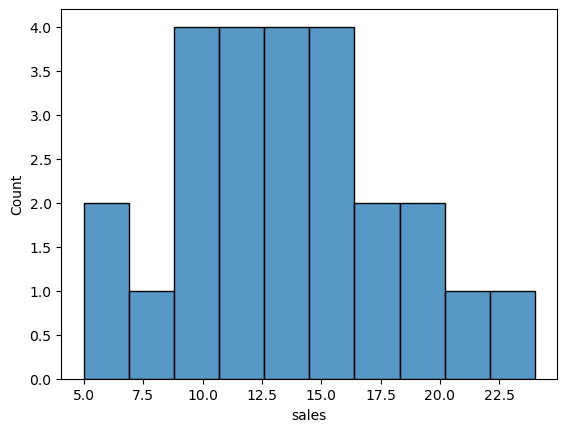

In [14]:
sns.histplot(data=df, x='sales', bins=10)

## Residuals

Linear Regression is sometimes not appropriate depending on the dataset. We can usually visually tell that. Check the 4 examples below for more info.

Anscombe's Quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

Only the top-left dataframe is appropriate for linear regression. The downside with the below example is that it is only when we are working with 1 feature. When we are working with more than feature what we could do is to plot the residual error. Check the examples in the below cells.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [15]:
test_residuals = y_test - test_predictions

It looks like linear regression is a good choice for our data, because below we cannot see any patterns. The dots are randomly positioned below and above the red line

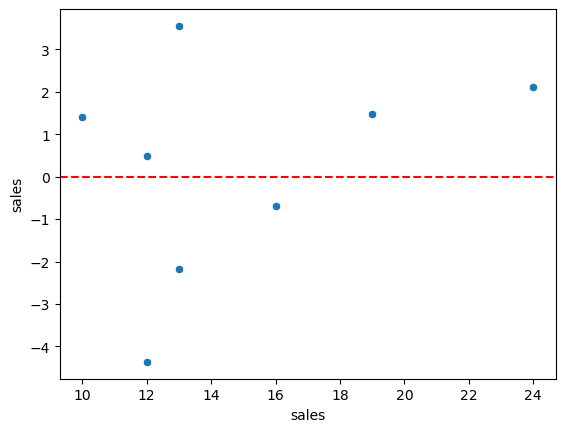

In [16]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')

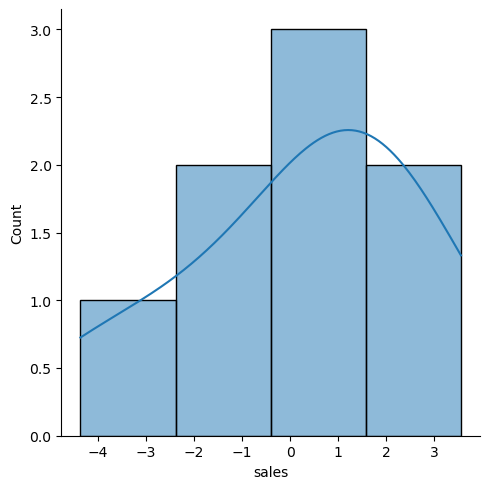

In [17]:
sns.displot(test_residuals, kde=True)

In [18]:
import scipy as sp

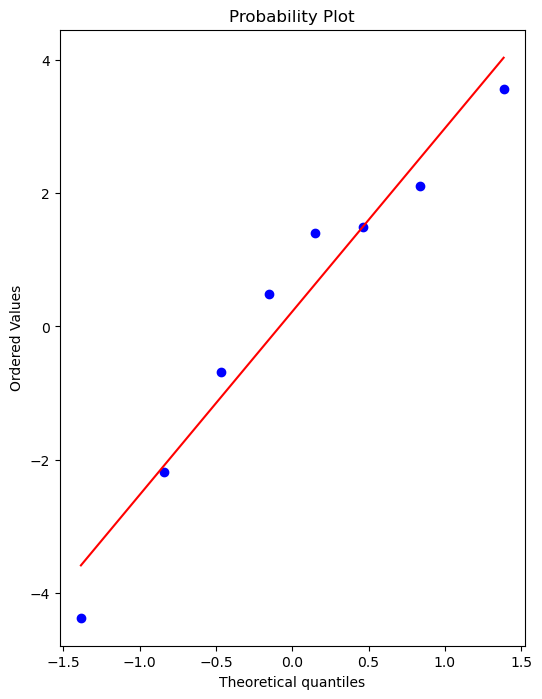

In [19]:
fig, ax = plt.subplots(figsize=(6, 8))
_ = sp.stats.probplot(test_residuals, plot=ax)

## Retraining Model on Full Data

If we are satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).

In [20]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [21]:
y_hat = final_model.predict(X)

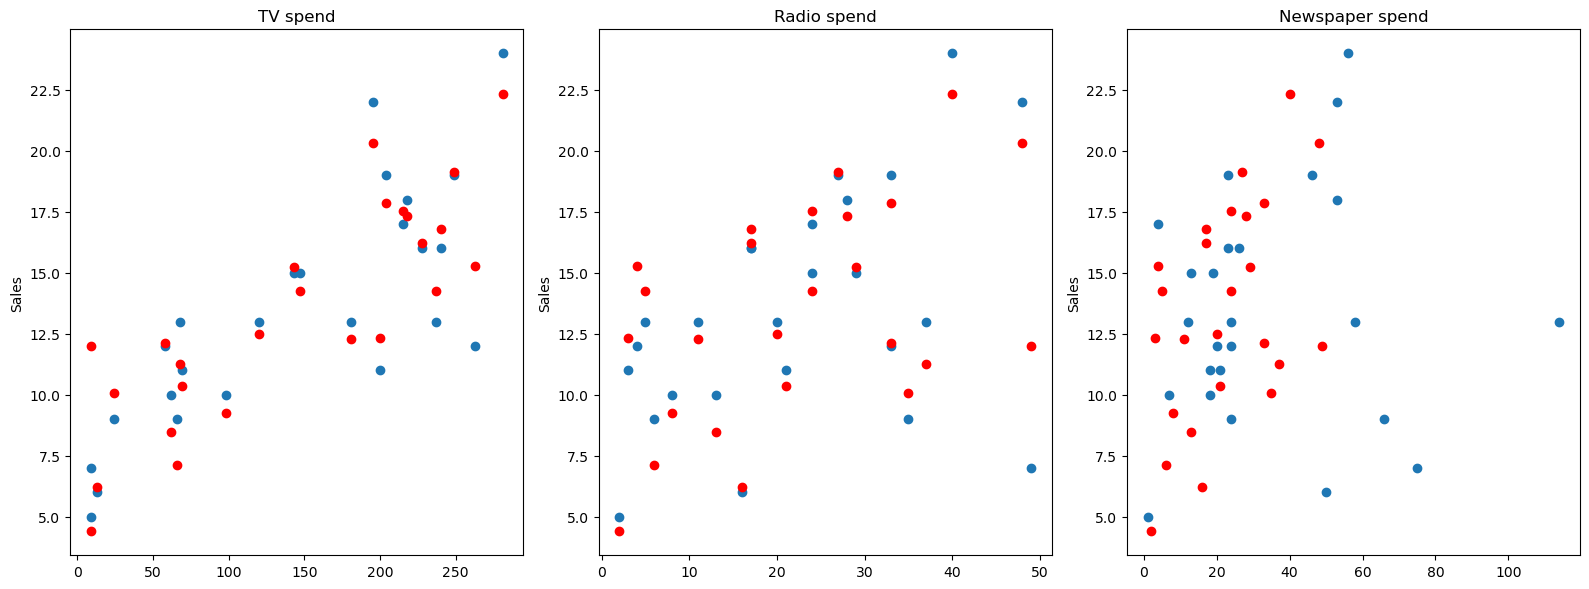

In [22]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['tv'], df['sales'], 'o')
axes[0].plot(df['tv'], y_hat, 'o', color='red')
axes[0].set_title("TV spend")
axes[0].set_ylabel("Sales")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title("Radio spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['radio'], y_hat, 'o', color='red')
axes[2].set_title("Newspaper spend");
axes[2].set_ylabel("Sales")

plt.tight_layout();

### Residuals

Should be normally distributed

In [23]:
residuals = y_hat - y

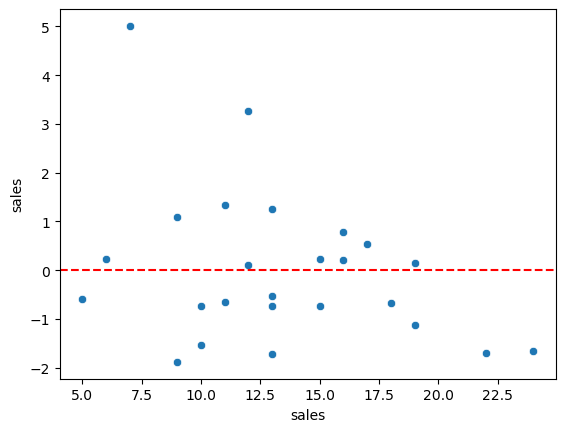

In [24]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

Based on our model there is no relationship between spending on advertisement on newspaper and making bigger sale, actually we are going to lose if we do that, because we have negative coef.

The coefs means that if we spend 1 unit on one of the advertisement channels we will have increase in sales with the value of the respective feature coef.

In [25]:
final_model.coef_

array([ 0.04293689,  0.19773846, -0.02279695])

In [26]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
tv,0.042937
radio,0.197738
newspaper,-0.022797


In [27]:
df.corr()

,tv,radio,newspaper,sales
tv,1.000000,-0.053231,-0.150903,0.794470
radio,-0.053231,1.000000,0.601467,0.455478
newspaper,-0.150903,0.601467,1.000000,0.097810
sales,0.794470,0.455478,0.097810,1.000000


### Prediction on New Data

Recall, X_test data set looks exactly the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

Our next ad campaign will have a total spend of 149 on TV, 22 on Radio, and 12 on Newspaper Ads, how many units could we expect to sell as a result of this? The answer is 14.11954608

How accurate is this prediction 14.11954608? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model

In [28]:
ctv = np.array([149])
cradio = np.array([22])
cnewspaper = np.array([12])

campaign = pd.DataFrame({'tv': ctv, 'radio': cradio, 'newspaper': cnewspaper})
final_model.predict(campaign)

array([14.11954608])

## Model Persistence (Saving and Loading a Model)

In [29]:
from joblib import dump, load

It will create a file with the model

In [30]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [31]:
loaded_model = load('sales_model.joblib')

In [32]:
loaded_model.predict(campaign)

array([14.11954608])

**Continue learning with next notebook `polynomial-regression-scikit.ipynb` where we will see how we can get more accurate results using polynomial regression.**